# DU-Euler法の実行例

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [24]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル変数の設定

In [25]:
T = 1.0
N = 100
η = T/N

0.01

### オイラー法

In [26]:
function Euler(a)
    x = zeros(N)
    x0 = 1.0
    for i in 1:N
        if i == 1
            x[1] = x0 + η*a[1]*x0
        else
            x[i] = x[i-1] + η*a[1]*x[i-1]
        end
    end
    return x
end        

Euler (generic function with 1 method)

### データセットの生成

データセットは$y = \exp(2 x)$にガウス乱数を加えて生成する。

In [27]:
function gen_dataset(std)
    x_data = zeros(N)
    for i in 1:N
        if i % 10 == 1
            x_data[i] = exp(2*(η*i)) + std*randn()
        else 
            x_data[i] = NaN
        end
    end
    return x_data
end

gen_dataset (generic function with 1 method)

### データセットと$y=\exp(2x)$のプロット

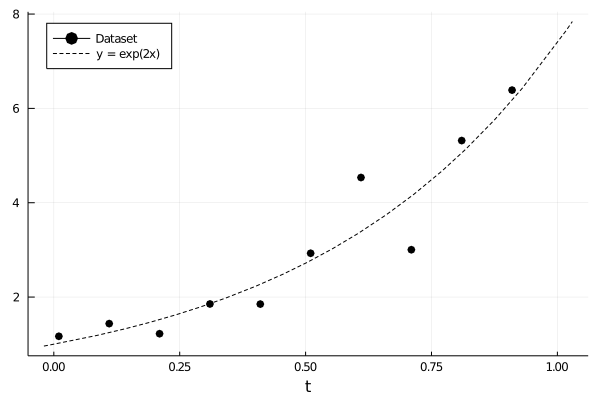

In [28]:
x_data = gen_dataset(0.5)
plot(η:η:T, x_data, marker=:o, label = "Dataset", color=:black, xlabel="t", legend=:topleft)
plot!(x->exp(2x), color=:black, ls=:dash, label="y = exp(2x)")

### DU-Euler法

In [29]:
function DU_Euler(a, x_data)
    x = 1.0
    loss = 0.0
    for i in 1:N
        x = x + η*a[1]*x
        if i % 10 == 1
            loss += (x - x_data[i])^2
        end
    end
    return loss
end        

DU_Euler (generic function with 1 method)

### 学習プロセス

In [30]:
opt = ADAM(0.2) 
train_itr = 100

a_train = [1.0]
ps = Flux.params(a_train)
for i in 1:train_itr
    gs = gradient(ps) do
        DU_Euler(a_train, x_data)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

### 学習の結果

In [31]:
a_train

1-element Vector{Float64}:
 2.035407003735164

### 学習されたパラメータに対応する解のプロット

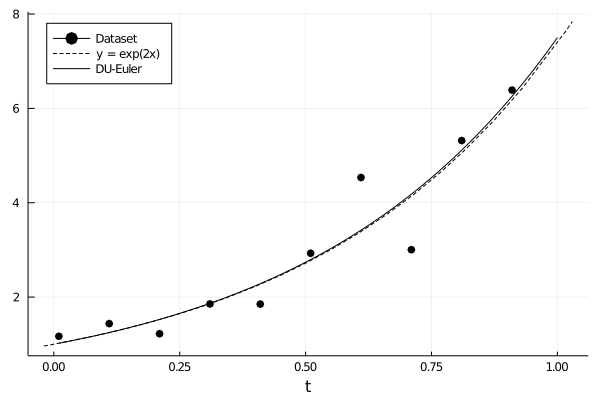

In [32]:
x = Euler(a_train)
plot!(η:η:T, x, color=:black, ls=:solid, label="DU-Euler")

In [33]:
savefig("DU-Euler.pdf")